In [1]:
# Dependencies
import numpy as np
import pandas as pd
from datetime import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = []
#june_temp = engine.execute("SELECT * FROM measurement")

for year in range(2010,2018):
    june_temp_yr=[]
    yr_june_start = f"{year}-06-01"
    yr_june_end = f"{year}-06-30"
    #print(yr_june_start, yr_june_end)
    june_temp_yr = session.query(Measurement.tobs).\
    filter((Measurement.date>=yr_june_start) & (Measurement.date<=yr_june_end)).all()
    june_temp.append(june_temp_yr)

june_temp_flat = [item for elem in june_temp for item in elem]
june_temp_flat

[(78.0),
 (76.0),
 (78.0),
 (76.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (82.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (74.0),
 (76.0),
 (75.0),
 (75.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (83.0),
 (75.0),
 (76.0),
 (73.0),
 (74.0),
 (74.0),
 (75.0),
 (70.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (74.0),
 (72.0),
 (76.0),
 (73.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (74.0),
 (73.0),
 (72.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (76.0),
 (74.0),
 (74.0),
 (73.0),
 (73.0),
 (76.0),
 (75.0),
 (70.0),
 (75.0),
 (73.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (70.0),
 (75.0),
 (74.0),
 (73.0),
 (74.0),
 (77.0),
 (76.0),
 (77.0),
 (75.0),
 (76.0),
 (79.0),
 (79.0),
 (77.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (76.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (69.0),
 (70.0),
 

In [6]:
#  3. Convert the June temperatures to a list.
june_temp_ls = [x[0] for x in june_temp_flat]
len(june_temp_ls)

1700

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_ls, columns=['tobs'])
june_temp_df

,tobs
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = []

for year in range(2010,2018):
    dec_temp_yr=[]
    yr_dec_start = f"{year}-12-01"
    yr_dec_end = f"{year}-12-31"
    dec_temp_yr = session.query(Measurement.tobs).\
    filter((Measurement.date>=yr_dec_start) & (Measurement.date<=yr_dec_end)).all()
    dec_temp.append(dec_temp_yr)

dec_temp_flat = [item for elem in dec_temp for item in elem]
dec_temp_flat

[(76.0),
 (74.0),
 (74.0),
 (64.0),
 (64.0),
 (67.0),
 (77.0),
 (66.0),
 (69.0),
 (68.0),
 (68.0),
 (71.0),
 (74.0),
 (67.0),
 (66.0),
 (69.0),
 (71.0),
 (70.0),
 (70.0),
 (74.0),
 (74.0),
 (71.0),
 (75.0),
 (75.0),
 (72.0),
 (73.0),
 (72.0),
 (73.0),
 (74.0),
 (73.0),
 (66.0),
 (64.0),
 (66.0),
 (75.0),
 (65.0),
 (69.0),
 (71.0),
 (69.0),
 (78.0),
 (74.0),
 (68.0),
 (68.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (69.0),
 (69.0),
 (72.0),
 (76.0),
 (72.0),
 (73.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (71.0),
 (72.0),
 (71.0),
 (64.0),
 (71.0),
 (62.0),
 (70.0),
 (64.0),
 (64.0),
 (70.0),
 (70.0),
 (69.0),
 (72.0),
 (68.0),
 (68.0),
 (65.0),
 (67.0),
 (68.0),
 (70.0),
 (67.0),
 (73.0),
 (70.0),
 (68.0),
 (72.0),
 (69.0),
 (71.0),
 (70.0),
 (75.0),
 (72.0),
 (75.0),
 (66.0),
 (66.0),
 (67.0),
 (76.0),
 (68.0),
 (69.0),
 (71.0),
 (70.0),
 (68.0),
 (66.0),
 (71.0),
 (70.0),
 (73.0),
 (78.0),
 (76.0),
 (73.0),
 (74.0),
 (63.0),
 (72.0),
 (75.0),
 (74.0),
 (72.0),
 (68.0),
 

In [17]:
# 7. Convert the December temperatures to a list.
dec_temp_ls = [x[0] for x in dec_temp_flat]
len(dec_temp_ls)

1517

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_ls, columns=['tobs'])
dec_temp_df

,tobs
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [20]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


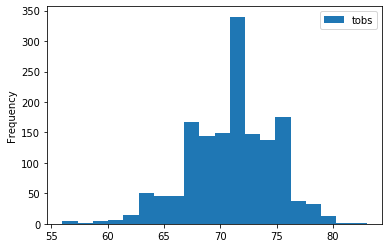

In [29]:
# December Temperature Histogram
dec_temp_df.plot.hist(bins = 20)

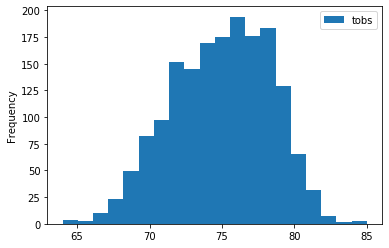

In [28]:
# June Temperature Histogram
june_temp_df.plot.hist(bins = 20)